# Trabalho Final - Algebra Linear

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

## Inicialmente, importando a base de dados e fazendo pequenas análises.

In [2]:
data = pd.read_csv('../trabalho_final/stars_data.csv')

# seleciona apenas os tipos de estrela que vamos abordar: anãs vermelhas e gigantes azuis, respectivamente
data = data[(data['Spectral Class'] == 'M') | (data['Spectral Class'] == 'K')]
data['Spectral Class'].replace(to_replace='M', value=1, inplace=True)
data['Spectral Class'].replace(to_replace='K', value=0, inplace=True)

data.sample(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
191,3257,0.0024,0.460,10.730,1,Red,1
73,3150,0.0088,0.350,11.940,1,Red,1
193,3212,0.0016,0.378,12.854,1,Red,1
15,3340,0.0038,0.240,13.070,1,Red,1
119,3780,200000.0000,1324.000,-10.700,5,Red,1


## Selecionando cols, normalizando e removendo NaNs
    papel importante a ser feito

In [3]:
cols = {
    'y' : 'Spectral Class',
    'x_1' : 'Temperature (K)',
    'x_2' : 'Radius(R/Ro)'
}

# reduz a base para as colunas que serão utilizadas
data = data[[cols['y'], cols['x_1'], cols['x_2'] ]]

# normaliza as colunas numéricas
data[[cols['x_1']]] = data[[cols['x_1']]]/data[[cols['x_1']]].mean()
data[[cols['x_2']]] = data[[cols['x_2']]]/data[[cols['x_2']]].mean()

# remove os dados nulos
data = data.dropna()

data.sample(5)

,Spectral Class,Temperature (K),Radius(R/Ro)
18,1,0.961146,0.000692
19,1,1.036123,0.001235
47,1,1.076171,0.313126
129,1,0.822334,0.000301
198,1,1.000893,0.001657


## Criando as funções para a Regressão Logística

### Função sigmóide (logit)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Função de custo

In [5]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 0.00001
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

### Gradiente descendente

In [6]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

### Função de predição
    Maior que 0.5 é arredondada p/ 1, menor p/ 0.

In [7]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

## Transformando os dados
    pd.core.series.Series em np.ndarray

In [8]:
y = data[cols['y']].to_numpy(dtype ='int')
y = y[:,np.newaxis] #transforma y em um vetor coluna

X_1 = data[cols['x_1']].to_numpy(dtype ='float')
X_1 = np.vstack((X_1)) #transforma x_1 em vec coluna

X_2 = data[cols['x_2']].to_numpy(dtype ='float')
X_2 = np.vstack((X_2)) #transforma x_2 em vec coluna

X = np.hstack((X_1,X_2))

X[:5] # equivalente a head(5)

array([[9.23808617e-01, 5.98105685e-04],
       [9.15979730e-01, 5.42517039e-04],
       [7.82888658e-01, 3.58863411e-04],
       [8.43110863e-01, 5.62922997e-04],
       [5.83854273e-01, 3.62381680e-04]])

Text(0, 0.5, 'Radius(R/Ro)')

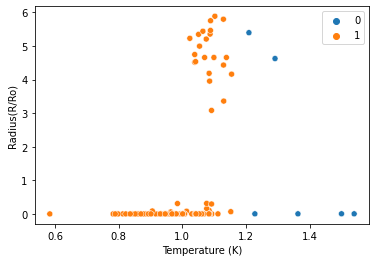

In [9]:
# plota os nossos dados
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y.reshape(-1));

# legendas
plt.xlabel(cols['x_1'].replace("_", " ").title())
plt.ylabel(cols['x_2'].replace("_", " ").title())

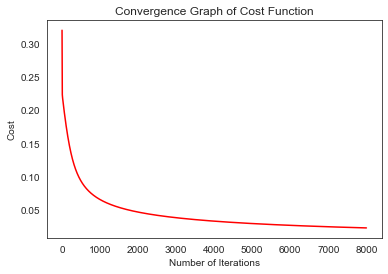

In [52]:
"""Plota o gráfico de custo por iteration

Interessante para que possamos observá-lo e verificar se a base em
questão exige mais ou menos iterações para dar um resultado eficiente.
O gráfico ideal deve ser uma curva convexa com valores próximos de 0 a
medida que o número de iterations aumenta."""
m = len(y)

X_new = np.hstack((np.ones((m,1)),X))
n = np.size(X_new,1)
params = np.zeros((n,1))

learning_rate = 3 # quanto mais baixa, mais refinada a pesquisa (exige mais iterations)
iterations = 8000 # quanto mais alta, maior a precisão

initial_cost = compute_cost(X_new, y, params)

(cost_history, params_optimal) = gradient_descent(X_new, y, params, learning_rate, iterations)

y_pred = predict(X_new, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [53]:
# avalia a precisão dos resultados

y_pred = predict(X_new, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))
print(score)

0.9914529914529915


Text(0, 0.5, 'Radius(R/Ro)')

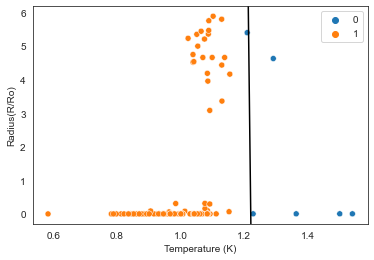

In [54]:
# cria um gráfico que exibe visualmente como a divisão está sendo dada

slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(x = X_new[:,1], y= X_new[:,2], hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

# legendas
plt.xlabel(cols['x_1'].replace("_", " ").title())
plt.ylabel(cols['x_2'].replace("_", " ").title())